# Wheat Dataset

This dataset contains information about 210 wheat kernel samples, characterized by various morphological attributes. These attributes are numeric and describe geometric and structural properties of the kernels. Additionally, there is a categorical column that likely represents the type or classification of the wheat kernels.The dataset is well-structured, with no missing values, and all features are numeric, facilitating statistical analysis and machine learning applications. It can be used to understand the relationships between kernel characteristics and their classification, which may be helpful in agricultural research, quality control, or identifying distinguishing traits of wheat varieties.

Dataset details:

Total Records: 210

8 Columns: 

* area: The surface area of the kernel.

* perimeter: The perimeter of the kernel.

* compactness: A measure of the kernel's shape compactness.

* length: Length of the kernel. 

* width: Width of the kernel.

* asymmetry coefficient: A measure of kernel asymmetry.

* groove length: Length of grooves in the kernel.

* category: A numeric value representing the classification or type of wheat.

## Importing Libraries


In [83]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error

## Loading the Dataset

In [84]:
df=pd.read_csv(r"C:\Users\alant\Downloads\wheat.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


## Data Cleaning

In [85]:
df.isna().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry coefficient    0
groove length            0
category                 0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
df.columns=df.columns.str.replace(" ","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   category               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


## Boxloting

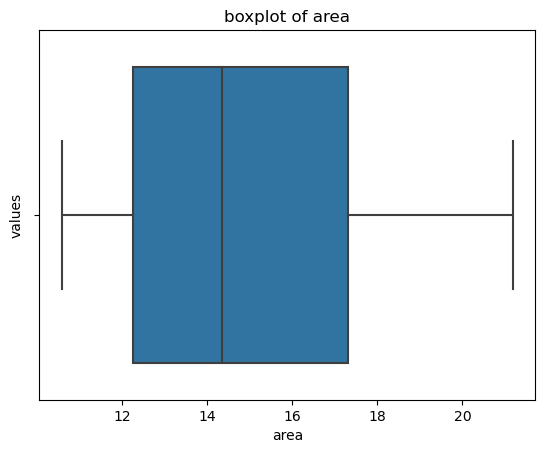

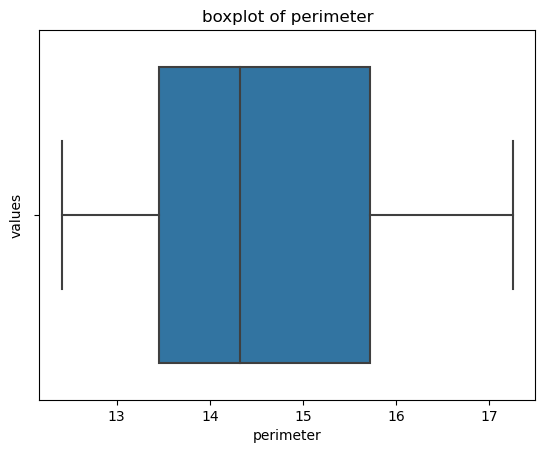

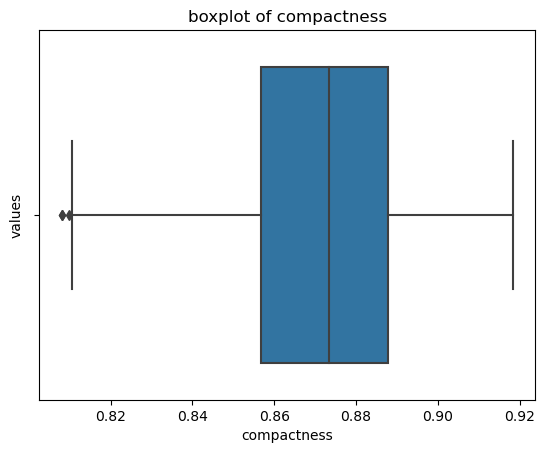

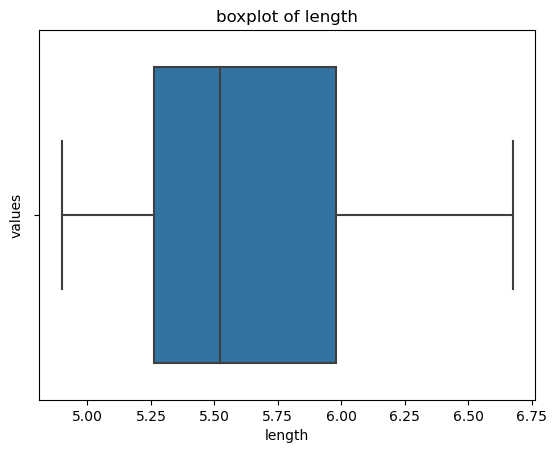

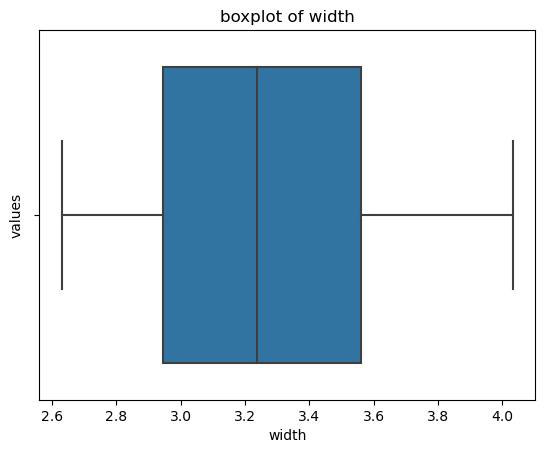

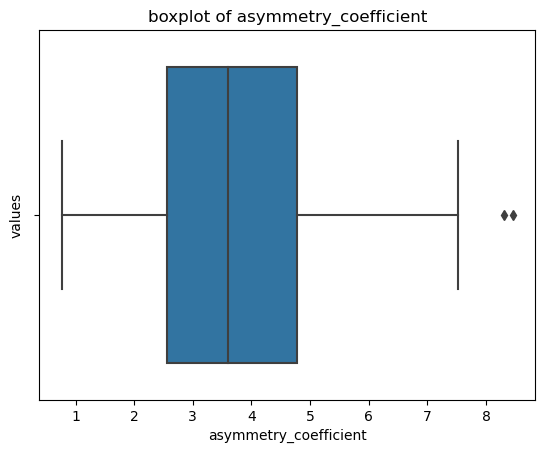

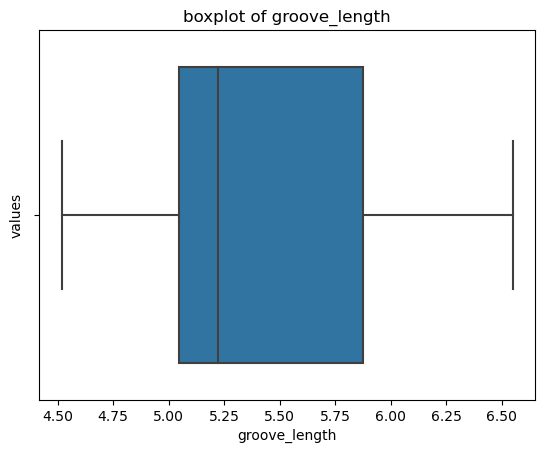

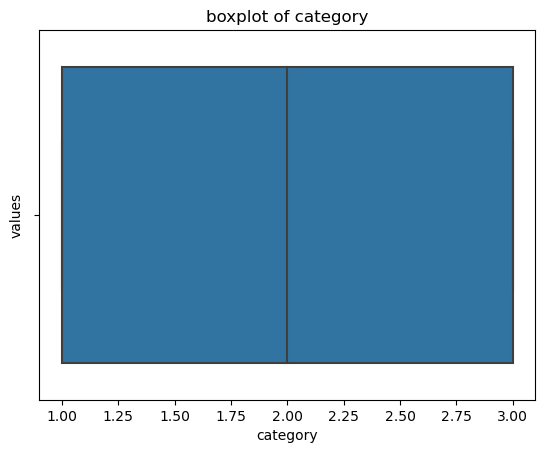

In [88]:
col=df.select_dtypes(include='number')
for i in col:
    sns.boxplot(data=df,x=i)
    plt.title(f"boxplot of {i}")
    plt.xlabel(i)
    plt.ylabel("values")
    plt.show()

## Removing Outliers

In [89]:
df=df[df["compactness"]>.82]
df=df[df["asymmetry_coefficient"]<7]


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'area'),
  Text(1, 0, 'perimeter'),
  Text(2, 0, 'compactness'),
  Text(3, 0, 'length'),
  Text(4, 0, 'width'),
  Text(5, 0, 'asymmetry_coefficient'),
  Text(6, 0, 'groove_length'),
  Text(7, 0, 'category')])

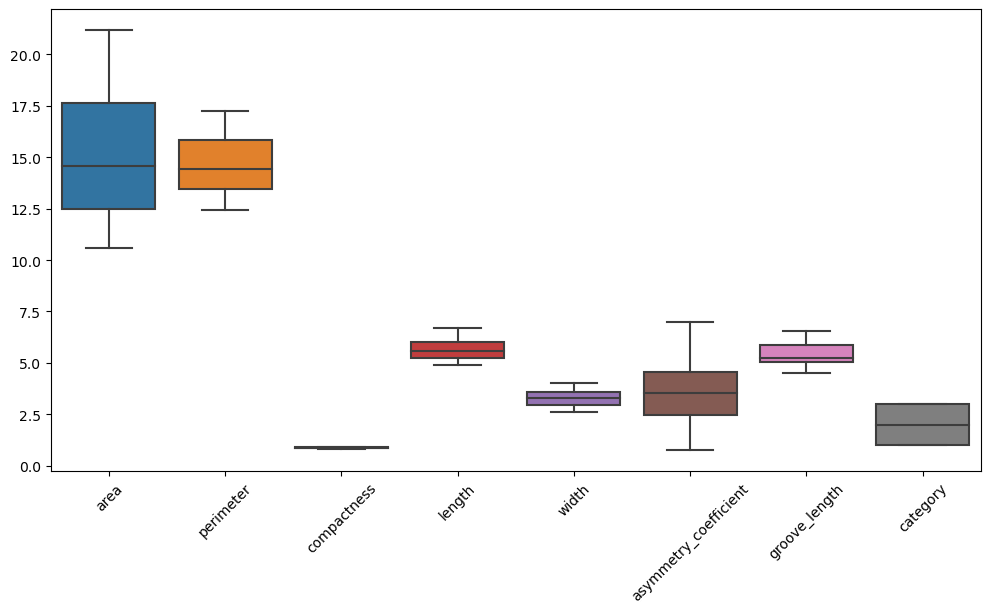

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)



## Taking first five rows using head() function

In [91]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


## Taking last five rows using tail() function

In [92]:
df.tail()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,category
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3.0
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3.0


## Statistical Analysis

### 1.Describe()

In [93]:
numeric_data=df.select_dtypes(['float64'])
des=numeric_data.describe()
print(des)

             area   perimeter  compactness      length       width  \
count  198.000000  198.000000   198.000000  198.000000  198.000000   
mean    15.032475   14.634293     0.873238    5.647121    3.285813   
std      2.887439    1.305120     0.021223    0.448731    0.368821   
min     10.590000   12.410000     0.824900    4.899000    2.630000   
25%     12.467500   13.470000     0.858850    5.262250    2.969500   
50%     14.555000   14.420000     0.874850    5.566000    3.279000   
75%     17.610000   15.857500     0.888000    6.014250    3.571250   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

       asymmetry_coefficient  groove_length    category  
count             198.000000     198.000000  198.000000  
mean                3.555562       5.421015    1.939394  
std                 1.379306       0.502198    0.803775  
min                 0.765100       4.519000    1.000000  
25%                 2.461250       5.044250    1.000000  
50%                 3

### 2.Covariance

In [94]:
covariance=numeric_data.cov()
print(covariance)

                           area  perimeter  compactness    length     width  \
area                   8.337304   3.749277     0.035987  1.237316  1.034573   
perimeter              3.749277   1.703338     0.014190  0.570890  0.456302   
compactness            0.035987   0.014190     0.000450  0.003441  0.005809   
length                 1.237316   0.570890     0.003441  0.201359  0.144079   
width                  1.034573   0.456302     0.005809  0.144079  0.136029   
asymmetry_coefficient -0.630401  -0.262921    -0.009118 -0.068393 -0.100063   
groove_length          1.267584   0.588189     0.002405  0.210380  0.141782   
category              -0.677159  -0.291870    -0.008507 -0.079160 -0.109879   

                       asymmetry_coefficient  groove_length  category  
area                               -0.630401       1.267584 -0.677159  
perimeter                          -0.262921       0.588189 -0.291870  
compactness                        -0.009118       0.002405 -0.008507  


### 3.Corelation

In [95]:
corelation=numeric_data.corr()
print(corelation)

                           area  perimeter  compactness    length     width  \
area                   1.000000   0.994911     0.587264  0.954953  0.971476   
perimeter              0.994911   1.000000     0.512291  0.974800  0.947951   
compactness            0.587264   0.512291     1.000000  0.361289  0.742106   
length                 0.954953   0.974800     0.361289  1.000000  0.870558   
width                  0.971476   0.947951     0.742106  0.870558  1.000000   
asymmetry_coefficient -0.158286  -0.146054    -0.311478 -0.110501 -0.196696   
groove_length          0.874157   0.897412     0.225613  0.933563  0.765473   
category              -0.291772  -0.278231    -0.498716 -0.219475 -0.370651   

                       asymmetry_coefficient  groove_length  category  
area                               -0.158286       0.874157 -0.291772  
perimeter                          -0.146054       0.897412 -0.278231  
compactness                        -0.311478       0.225613 -0.498716  


## Heatmap

<Axes: >

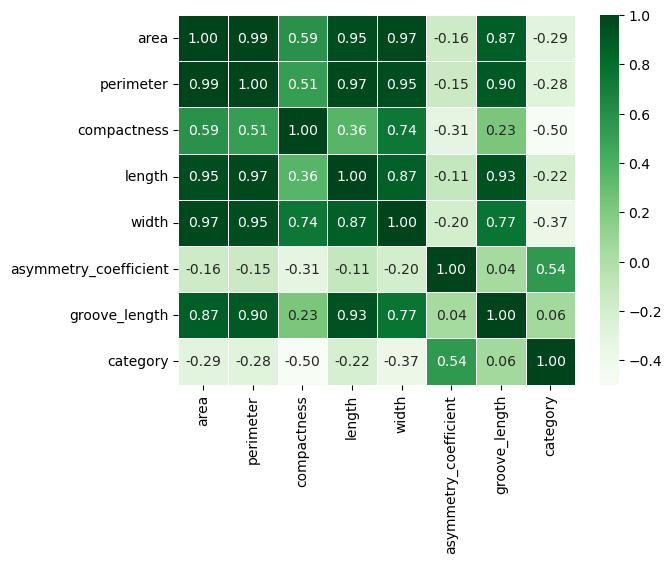

In [96]:
sns.heatmap(corelation,annot=True,cmap="Greens",fmt=".2f",linewidths=.5)

## Seperating Dependent & Indepenent Variable

In [97]:
x=df.iloc[:,0:7]
y=df.iloc[:,-1]

x=pd.DataFrame(x)




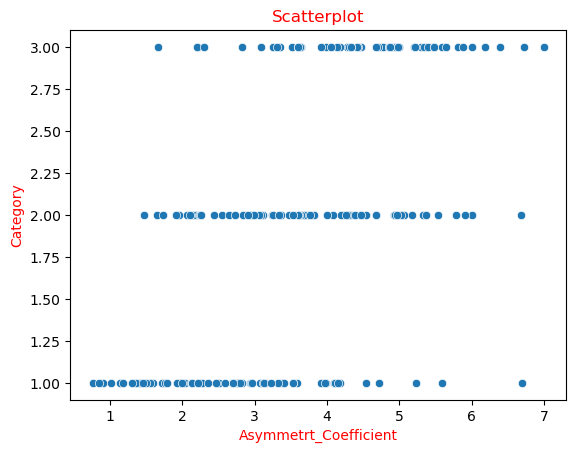

In [98]:
sns.scatterplot(x="asymmetry_coefficient", y="category", data=df)
plt.title("Scatterplot",color="red")
plt.xlabel("Asymmetrt_Coefficient",color="red")
plt.ylabel("Category",color="red")
plt.show()

## Scatterplot

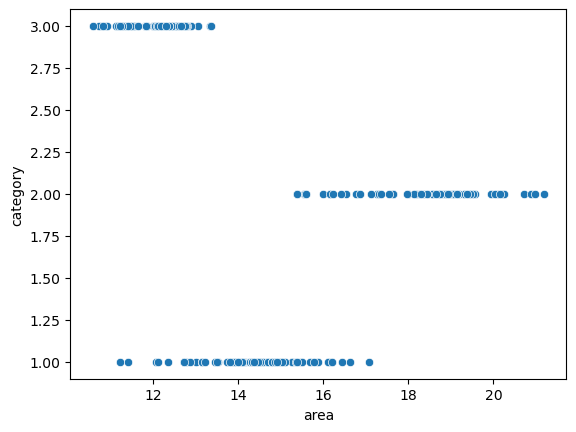

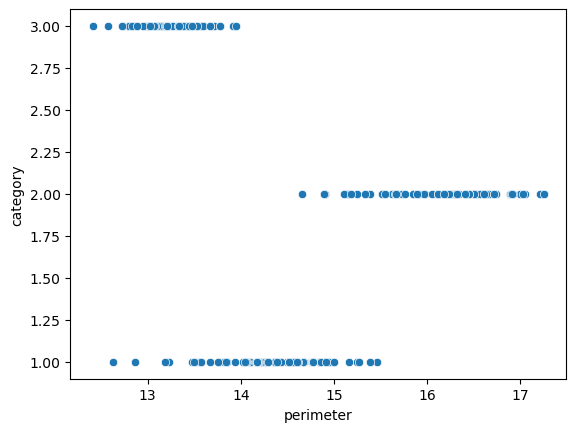

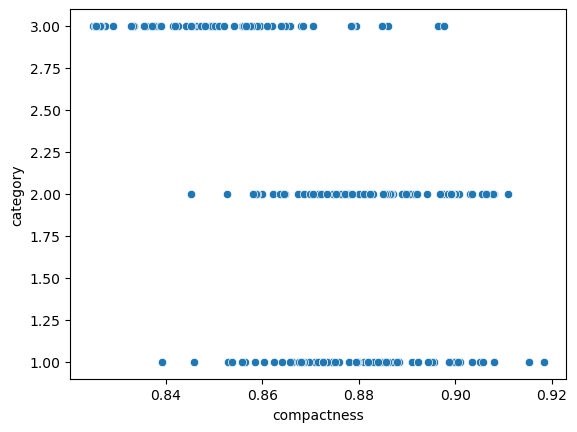

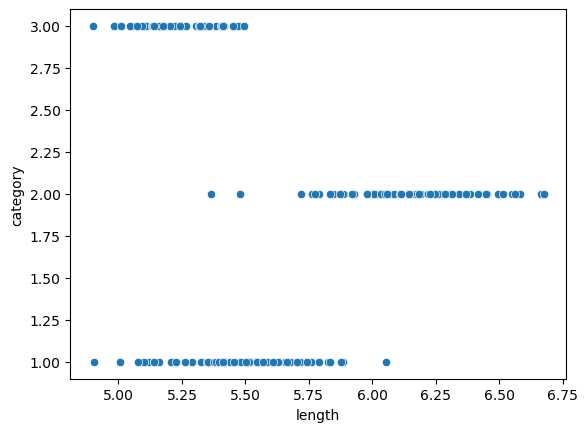

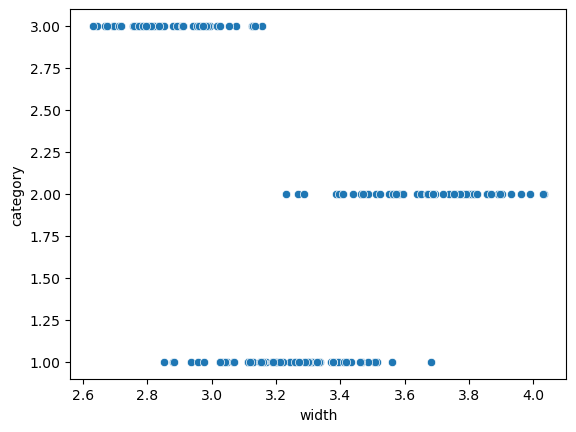

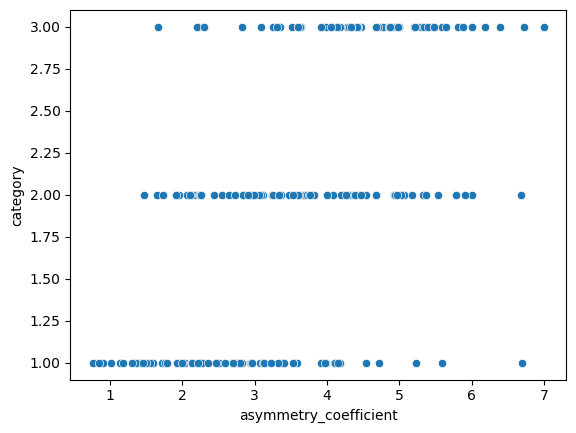

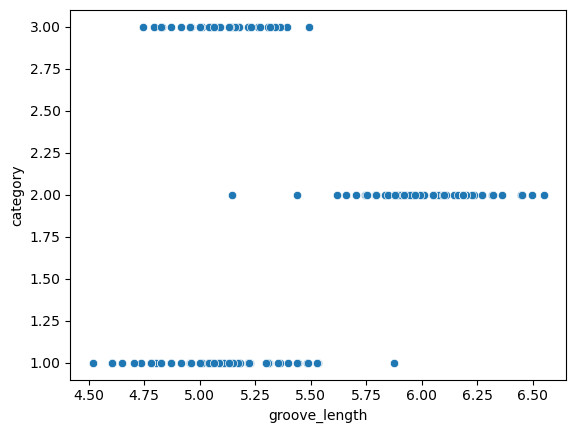

In [99]:
for i in x:
    sns.scatterplot(data=df,x=i,y=y)
    plt.show()

## Split the Dataset into Training & Testing


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=6)

In [101]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred=log.predict(x_test)

## Predicting the Accuracy

In [103]:
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100,"%")

Mean absolute error: 0.1
Mean squared error: 0.2
Root mean squared error: 0.4472135954999579
Accuracy: 95.0 %
